In [29]:
from sklearn import datasets, ensemble, cross_validation, learning_curve, metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

cv = 10

In [32]:
dtc = DecisionTreeClassifier()

In [33]:
scoresDecisionTree = cross_validation.cross_val_score(dtc, X, y, cv=cv)
print scoresDecisionTree.mean()

0.836903282019


In [34]:
def plot_scores(scores):
    pylab.grid(True)
    pylab.plot(range(cv), scores, label='cv scores')
    pylab.ylim((0.0, 1.05))
    pylab.legend(loc='lower right')

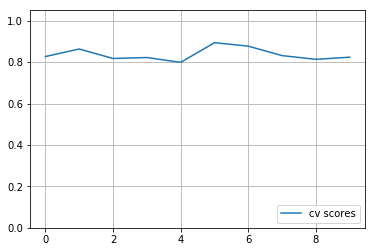

In [35]:
plot_scores(scoresDecisionTree)

In [49]:
bgc = BaggingClassifier(dtc,n_estimators=100)

0.926576533128


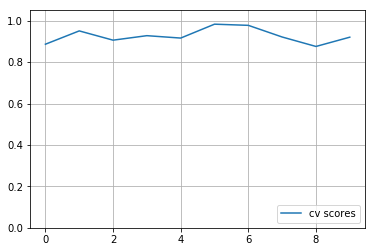

In [50]:
scoresBaggingClassifier = cross_validation.cross_val_score(bgc, X, y, cv=cv)
plot_scores(scoresBaggingClassifier)
print scoresBaggingClassifier.mean()

In [38]:
q = int(np.sqrt(X.shape[1]))
print q

8


In [39]:
bgci = BaggingClassifier(n_estimators=100, max_features=q)

0.937232017652


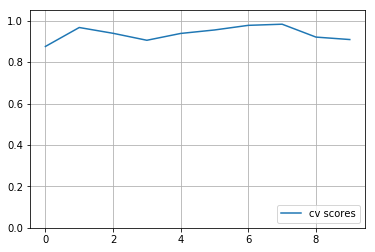

In [40]:
scoresBaggingClassifierImpr = cross_validation.cross_val_score(bgci, X, y, cv=cv)
plot_scores(scoresBaggingClassifierImpr)
print scoresBaggingClassifierImpr.mean()

In [41]:
dtcI = DecisionTreeClassifier(max_features=q)
bgciForDTC = BaggingClassifier(dtcI, n_estimators=100)

0.951680689565


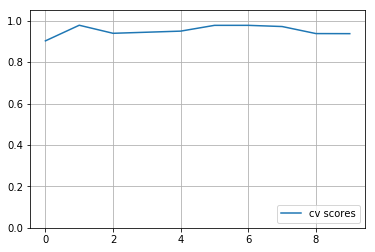

In [42]:
scoresDecisionTreeImproved = cross_validation.cross_val_score(bgciForDTC, X, y, cv=cv)

plot_scores(scoresDecisionTreeImproved)
print scoresDecisionTreeImproved.mean()

# Random Forest

In [43]:
def plot_dependency(title, plot_data):
    pylab.plot(plot_data[0], plot_data[1], marker='.', label='RandomForest')
    pylab.grid(True)
    pylab.xlabel(title)
    pylab.ylabel('score')
    pylab.title('Accuracy score')
    pylab.legend(loc='lower right')

0.951680689565


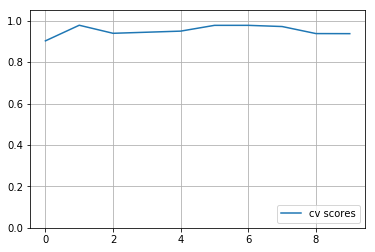

In [44]:
rfc = RandomForestClassifier()
scoresRandomForestClassifier = cross_validation.cross_val_score(rfc, X, y, cv=cv)

plot_scores(scoresDecisionTreeImproved)
print scoresDecisionTreeImproved.mean()

In [80]:
plot_data = []
for i in range(1,20):
    trees = 5 * i
    rfc = RandomForestClassifier(n_estimators = trees, random_state=1)
    scoring1 = cross_validation.cross_val_score(rfc, X, y, cv=cv)
    plot_data.append((trees, scoring1.mean()))
plot_data = zip(*plot_data) #unzip actually :)
# print plot_data

0.955592519655


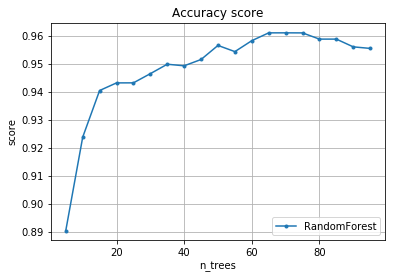

In [81]:
plot_dependency('n_trees', plot_data)
print scoring1.mean()

In [77]:
plot_data = []
for i in range(1,7):
    features = 10 * i
    rfc = RandomForestClassifier(n_estimators = 45, random_state=1, max_features = features)
    scoring2 = cross_validation.cross_val_score(rfc, X, y, cv=cv)
    plot_data.append((features, scoring2.mean()))
plot_data = zip(*plot_data) #unzip actually :)

0.922692552875


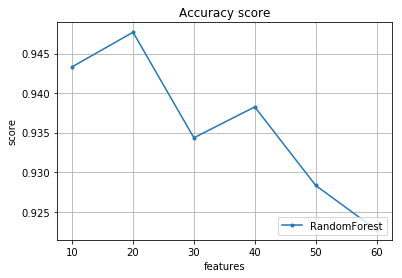

In [78]:
plot_dependency('features', plot_data)
print scoring2.mean()

In [74]:
plot_data = []
for i in range(1,10):
    depth = i
    rfc = RandomForestClassifier(n_estimators = 45, random_state=1, max_depth = depth)
    scoring3 = cross_validation.cross_val_score(rfc, X, y, cv=cv)
    plot_data.append((depth, scoring3.mean()))
plot_data = zip(*plot_data) #unzip actually :)


0.943940245709


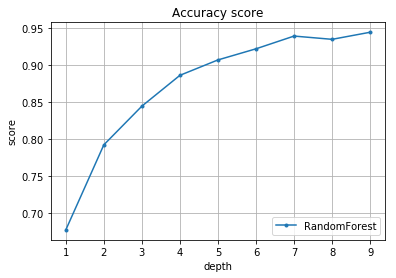

In [75]:
plot_dependency('depth', plot_data)
print scoring3.mean()

In [86]:
estimator1 = ensemble.RandomForestClassifier(n_estimators = 45, max_features = 20, random_state=1, max_depth=10)
estimator2 = ensemble.RandomForestClassifier(n_estimators = 45, random_state=1)

score1 = cross_validation.cross_val_score(estimator1, X, y, scoring = 'accuracy', cv = cv) 
score2 = cross_validation.cross_val_score(estimator2, X, y, scoring = 'accuracy', cv = cv)

print score1.mean()
print score2.mean()

0.942200211262
0.951628078934
